In [1]:
# importing the necessary packages
# numpy and pandas have been used for most part
#http://www.numpy.org/
#https://pandas.pydata.org/
#https://stackoverflow.com/
    
import os, json, glob
import os.path as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import json_lines
from pandas.tools.plotting import autocorrelation_plot
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from tempfile import TemporaryFile

In [2]:
frames1 = pd.read_json('gait_test1.jsonl', lines=True)

In [3]:
frames2 = pd.read_json('gait_test2.jsonl', lines=True)

In [4]:
print(len(frames1))

362


In [5]:
print(len(frames2))

359


In [6]:
print(frames1.head())

                                              people  version
0  [{'hand_right_keypoints_2d': [444.225, 554.6, ...      1.2
1  [{'hand_right_keypoints_2d': [449.2, 554.055, ...      1.2
2  [{'hand_right_keypoints_2d': [372.365, 525.336...      1.2
3  [{'hand_right_keypoints_2d': [446.459, 552.023...      1.2
4  [{'hand_right_keypoints_2d': [446.48, 550.598,...      1.2


In [7]:
kp1 = frames1.iloc[:,0]

In [8]:
len(kp1[0][0]['pose_keypoints_2d'])

54

In [9]:
kp2 = frames2.iloc[:,0]

In [34]:

def get_pose_kp(data):
    x_points = []
    y_points = []
    c_points = []
    for i in range(len(data)):
        res1 = data[i]
        if len(res1) == 0:
            res1 = [0]*54
        else:
            res1 = data[i][0]['pose_keypoints_2d']
        x_l = x_points.append([res1[k] for k in range(0,54,3)])
        y_l = y_points.append([res1[k] for k in range(1,54,3)])
        c_l = c_points.append([res1[k] for k in range(2,54,3)])

    x_points = x_points[0:326]
    y_points = y_points[0:326]
    c_points = c_points[0:326]
    #points_x = [x for x in x_points if (x[10] and x[13]) > 0]
    #print(len(points_x))
  
    # getting the points for right_hip
    hip_right_x = np.asarray([x[8] for x in x_points])
    hip_right_y = np.asarray([y[8] for y in y_points])
    hip_right_c = np.asarray([c[8] for c in c_points])
    hip_right_x_i = np.interp((np.argwhere(hip_right_x >= 0)[:,0]), (np.argwhere(hip_right_x > 0)[:,0]), hip_right_x[hip_right_x > 0])
    hip_right_y_i = np.interp((np.argwhere(hip_right_y >= 0)[:,0]), (np.argwhere(hip_right_y > 0)[:,0]), hip_right_y[hip_right_y > 0])
    hip_right_c_i = np.interp((np.argwhere(hip_right_c >= 0)[:,0]), (np.argwhere(hip_right_c > 0)[:,0]), hip_right_c[hip_right_c > 0])
    hip_right = np.stack((hip_right_x_i, hip_right_y_i, hip_right_c_i), axis = 1)
    hip_right_norm = (hip_right - hip_right.mean(axis=0))/hip_right.std(axis=0)
    #print(np.all(np.diff(hip1) > 0))
  
    

     # getting the points for right_knee
    knee_right_x = np.asarray([x[9] for x in x_points])
    knee_right_y = np.asarray([y[9] for y in y_points])
    knee_right_c = np.asarray([c[9] for c in c_points])
    knee_right_x_i = np.interp((np.argwhere(knee_right_x >= 0)[:,0]), (np.argwhere(knee_right_x > 0)[:,0]), knee_right_x[knee_right_x > 0])
    knee_right_y_i = np.interp((np.argwhere(knee_right_y >= 0)[:,0]), (np.argwhere(knee_right_y > 0)[:,0]), knee_right_y[knee_right_y > 0])
    knee_right_c_i = np.interp((np.argwhere(knee_right_c >= 0)[:,0]), (np.argwhere(knee_right_c > 0)[:,0]), knee_right_c[knee_right_c > 0])
    knee_right = np.stack((knee_right_x_i, knee_right_y_i, knee_right_c_i), axis = 1)
    knee_right_norm = (knee_right - knee_right.mean(axis=0))/knee_right.std(axis=0)
    
     # getting the points for right_ankle
    ankle_right_x = np.asarray([x[10] for x in x_points])
    ankle_right_y = np.asarray([y[10] for y in y_points])
    ankle_right_c = np.asarray([c[10] for c in c_points])
    ankle_right_x_i = np.interp((np.argwhere(ankle_right_x >= 0)[:,0]), (np.argwhere(ankle_right_x > 0)[:,0]), ankle_right_x[ankle_right_x > 0])
    ankle_right_y_i = np.interp((np.argwhere(ankle_right_y >= 0)[:,0]), (np.argwhere(ankle_right_y > 0)[:,0]), ankle_right_y[ankle_right_y > 0])
    ankle_right_c_i = np.interp((np.argwhere(ankle_right_c >= 0)[:,0]), (np.argwhere(ankle_right_c > 0)[:,0]), ankle_right_c[ankle_right_c > 0])
    ankle_right = np.stack((ankle_right_x_i, ankle_right_y_i, ankle_right_c_i), axis = 1)
    #ankle_right_norm = (ankle_right - ankle_right.mean(axis=0))/ankle_right.std(axis=0)
    
     # getting the points for left_hip
    hip_left_x = np.asarray([x[11] for x in x_points])
    hip_left_y = np.asarray([y[11] for y in y_points])
    hip_left_c = np.asarray([c[11] for c in c_points])
    hip_left_x_i = np.interp((np.argwhere(hip_left_x >= 0)[:,0]), (np.argwhere(hip_left_x > 0)[:,0]), hip_left_x[hip_left_x > 0])
    hip_left_y_i = np.interp((np.argwhere(hip_left_y >= 0)[:,0]), (np.argwhere(hip_left_y > 0)[:,0]), hip_left_y[hip_left_y > 0])
    hip_left_c_i = np.interp((np.argwhere(hip_left_c >= 0)[:,0]), (np.argwhere(hip_left_c > 0)[:,0]), hip_left_c[hip_left_c > 0])
    hip_left = np.stack((hip_left_x_i, hip_left_y_i, hip_left_c_i), axis = 1)
    #hip_left_norm = (hip_left - hip_left.mean(axis=0))/hip_left.std(axis=0)
    #hip_left_norm = np.divide(hip_left, mean_norm)
    
     # getting the points for left_knee
    knee_left_x = np.asarray([x[12] for x in x_points])
    knee_left_y = np.asarray([y[12] for y in y_points])
    knee_left_c = np.asarray([c[12] for c in c_points])
    knee_left_x_i = np.interp((np.argwhere(knee_left_x >= 0)[:,0]), (np.argwhere(knee_left_x > 0)[:,0]), knee_left_x[knee_left_x > 0])
    knee_left_y_i = np.interp((np.argwhere(knee_left_y >= 0)[:,0]), (np.argwhere(knee_left_y > 0)[:,0]), knee_left_y[knee_left_y > 0])
    knee_left_c_i = np.interp((np.argwhere(knee_left_c >= 0)[:,0]), (np.argwhere(knee_left_c > 0)[:,0]), knee_left_c[knee_left_c > 0])
    knee_left = np.stack((knee_left_x_i, knee_left_y_i, knee_left_c_i), axis = 1)
    knee_left_norm = (knee_left - knee_left.mean(axis=0))/knee_left.std(axis=0)
    #hip_left_norm = np.divide(hip_left, mean_norm)
     # getting the points for left_ankle
    ankle_left_x = np.asarray([x[13] for x in x_points])
    ankle_left_y = np.asarray([y[13] for y in y_points])
    ankle_left_c = np.asarray([c[13] for c in c_points])
    ankle_left_x_i = np.interp((np.argwhere(ankle_left_x >= 0)[:,0]), (np.argwhere(ankle_left_x > 0)[:,0]), ankle_left_x[ankle_left_x > 0])
    ankle_left_y_i = np.interp((np.argwhere(ankle_left_y >= 0)[:,0]), (np.argwhere(ankle_left_y > 0)[:,0]), ankle_left_y[ankle_left_y > 0])
    ankle_left_c_i = np.interp((np.argwhere(ankle_left_c >= 0)[:,0]), (np.argwhere(ankle_left_c > 0)[:,0]), ankle_left_c[ankle_left_c > 0])
    ankle_left = np.stack((ankle_left_x_i, ankle_left_y_i, ankle_left_c_i), axis = 1)

    #np.savetxt('left_ankle.csv', ankle_left)
    #ankle_left_norm = (ankle_left - ankle_left.mean(axis=0))/ankle_left.std(axis=0)
    
    
     # getting the points for centre 
    center_x = np.asarray([x[1] for x in x_points])
    center_y = np.asarray([y[1] for y in y_points])
    center_c = np.asarray([c[1] for c in c_points])
    center_x_i = np.interp((np.argwhere(center_x >= 0)[:,0]), (np.argwhere(center_x > 0)[:,0]), center_x[center_x > 0])
    center_y_i = np.interp((np.argwhere(center_y >= 0)[:,0]), (np.argwhere(center_y > 0)[:,0]), center_y[center_y > 0])
    center_c_i = np.interp((np.argwhere(center_c >= 0)[:,0]), (np.argwhere(center_c > 0)[:,0]), center_c[center_c > 0])
    center = np.stack((center_x_i, center_y_i, center_c_i), axis = 1)
    center_norm = (center - center.mean(axis=0))/center.std(axis=0)
    #norm = np.stack((right_norm, left_norm), axis = 1)

    #center point vector
    right_norm = np.linalg.norm(center[:,:2] - hip_right[:,:2], axis = 1)
    left_norm = np.linalg.norm(center[:,:2] - hip_left[:,:2], axis = 1)
    norm = np.stack((right_norm, left_norm), axis = 1)
    #print(norm.shape)
    mean_norm = np.mean(norm, axis = 1)
    #print(mean_norm)
    left_foot = pd.DataFrame(ankle_left, columns=['x', 'y', 'c'])
    diff_left = np.sqrt(np.power(left_foot['x'].shift()-left_foot['x'],2)+np.power(left_foot['y'].shift()-left_foot['y'],2))
    diff_left_norm = np.divide(diff_left, mean_norm)
    diff_left_norm = diff_left_norm.fillna(0)
    left_diff = pd.DataFrame(diff_left_norm)
    left_diff.index.name = 'time'
    left_diff.columns = ['velocity b/w frames']
    left_diff = left_diff.fillna(0)
    left_diff.to_csv('left_leg_speed.csv')
    len(left_diff)
   #for wobble
    print(type(ankle_left))
    ankle_left_norm = np.divide(ankle_left[:,:], mean_norm.reshape(326,1))
    ankle_right_norm = np.divide(ankle_right[:,:], mean_norm.reshape(326,1))
    
    right_foot = pd.DataFrame(ankle_right, columns=['x', 'y', 'c'])
    diff_right = np.sqrt(np.power(right_foot['x'].shift()-right_foot['x'],2)+np.power(right_foot['y'].shift()-right_foot['y'],2))
    diff_right_norm = np.divide(diff_right, mean_norm)
    diff_right_norm = diff_right_norm.fillna(0)
    right_diff = pd.DataFrame(diff_right_norm)
    right_diff.index.name = 'time'
    right_diff.columns = ['velocity b/w frames']
    right_diff = right_diff.fillna(0)
    right_diff.to_csv('right_leg_speed.csv')
    
    fig1 = plt.figure()
    plt.plot(np.arange(1,len(diff_right_norm)+1), diff_right_norm, linewidth= 0.5)
    plt.xlabel("Time")
    plt.ylabel("Right Gait Spped")
    plt.title("Normalised Step Velocity")
    plt.show()
    fig1.savefig('r_norm_gait.pdf', dpi=fig1.dpi)
    
    
    fig2 = plt.figure()
    plt.plot(np.arange(1,len(diff_right_norm)+1), diff_right_norm, linewidth= 0.5)
    plt.xlabel("Time")
    plt.ylabel("Left Gait Spped")
    plt.title("Normalised Step Velocity")
    plt.show()
    fig2.savefig('l_norm_gait.pdf', dpi=fig2.dpi)
    
    figa = plt.figure()
    plt.scatter(ankle_left_norm[:,0],ankle_left_norm[:,1], s=12)
    plt.xlabel("x_points")
    plt.ylabel("y_points")
    plt.title("Right Ankle Position")
    plt.show()
    figa.savefig('r_scatter_gait.pdf', dpi=figa.dpi)

    figb = plt.figure()
    plt.scatter(ankle_right_norm[:,0],ankle_right_norm[:,1], s=12)
    plt.xlabel("x_points")
    plt.ylabel("y_points")
    plt.title("Left Ankle Position")
    plt.show()
    figb.savefig('l_scatter_gait.pdf', dpi=figb.dpi)
    
# get difference between x[1] and mean of x[11]+x[8]/2 * normlaise distance 
    wobble = abs(center[:,0] - np.add(hip_left[:,0], hip_right[:,0])/2)/mean_norm
    #print(hip_right[0,0])
    #print(hip_left[0,0])
    #print(wobble.std())
    #print(wobble.min())
    #print(wobble.max())
    #print(wobble.mean())
# get the standard deviation of this , see how it moves. 
    #print(left_diff.shape)
    #print(left_diff[:,-1:].shape)
    #plt.scatter(range(1,327), wobble, s = 3)
    #plt.plot(np.arange(1,327), diff_left_norm, linewidth= 0.5)
    #plt.errorbar(np.arange(1,327), wobble, wobble.std())
    #sns.pointplot(np.arange(1,327), wobble, ci="sd", capsize=.2)
    
    data = np.sin(diff_left_norm)
    peakind = signal.find_peaks_cwt(data, np.arange(1,327))
    print(peakind)
    print(diff_left_norm[peakind])
    print(data[peakind])

    def autocorr1(x,lags = 20):
        mean=np.mean(x)
        var=np.var(x)
        xp=x-mean
        print(xp)
        n = len(x)
        #corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l], ddof=0)[0][1] for l in range(0,lags+1)]
        corr= [1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in range(0,20+1)]
        acf = np.array(corr)
        #left_acf1 = pd.DataFrame(acf)
        #left_acf1.index.name = 'lags'
        #left_acf1.columns = ['acf']
        #left_acf1.to_csv('left_speed_acf.csv')
        plt.plot(np.arange(0,len(acf)),acf, linewidth = 0.5, marker='.', markersize=3)
        plt.show()
    
    #def acf(x, length=20):
     #   return np.array([1]+[np.corrcoef(x[:-i], x[i:])  \
      #      for i in range(1, length)])
    
    acf = autocorr1(left_diff)
    #yunbiased = diff_left_norm - np.mean(diff_left_norm)
    #ynorm = np.sum(yunbiased**2)
    #acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    N = len(diff_left_norm)
    lags = np.arange(30)
    var=np.var(diff_left_norm)
    xp = diff_left_norm - np.mean(diff_left_norm)
    corr = np.correlate(xp,xp,'full')[N-1:]/var/N
    corr1 = corr[:len(lags)+1]
    left_acf1 = pd.DataFrame(corr1)
    left_acf1.index.name = 'lags'
    left_acf1.columns = ['acf']
   # left_acf1.to_csv('left_speed_acf.csv')
    
# use only second half
    #half = acor[:len(lags)]
    #lengths = range(N, N//2, -1)
    #half /= lengths
  #  plt.plot(corr1)
   # plt.show()
    
    # need to get peaks for acf (step frequncy / other option - damped oscillation)
    #autocorrelation_plot(left_diff)
    #plt.plot(np.arange(0,len(acf)), acf, linewidth = 0.5)
   # plot_acf(left_diff, ax=None, lags=30, alpha=None, use_vlines=True, unbiased=True, fft=False, 
            # title='Autocorrelation', zero=True, vlines_kwargs=None)
    #plt.show()
    #left_acf = acf(left_diff, unbiased=False, nlags=len(left_diff), qstat=False, fft=False, alpha=None, missing='None')
    
  
    

    #left_acf1 = pd.DataFrame(left_acf)
    #left_acf1.index.name = 'time/lag'
    #left_acf1.columns = ['acf']
    #left_acf1.to_csv('left_speed_acf.csv')
    
    #plt.show()
    return len(left_diff)
# define my own f

<class 'numpy.ndarray'>


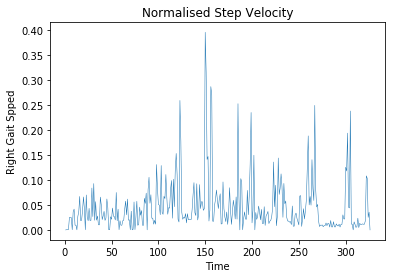

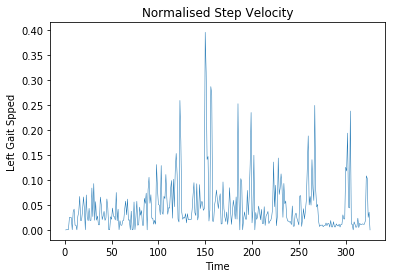

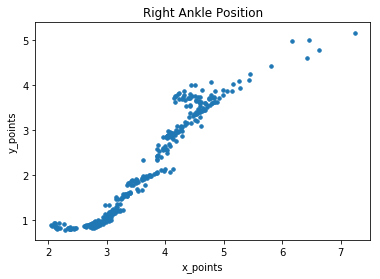

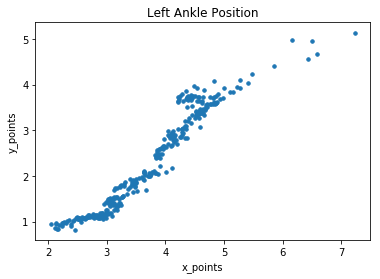

[ 43 109 183 200 274]
time
43     0.048902
109    0.099846
183    0.024015
200    0.022199
274    0.233135
dtype: float64
time
43     0.048882
109    0.099680
183    0.024012
200    0.022197
274    0.231028
dtype: float64
      velocity b/w frames
time                     
0               -0.048129
1               -0.048000
2               -0.048004
3               -0.029349
4               -0.035791
5               -0.035873
6               -0.035960
7               -0.020512
8                0.009593
9               -0.029387
10              -0.027322
11              -0.027439
12              -0.011463
13              -0.007453
14              -0.007987
15              -0.047331
16              -0.022038
17              -0.028664
18              -0.022163
19               0.054553
20               0.011784
21              -0.028568
22               0.022674
23               0.009145
24              -0.030421
25              -0.028853
26              -0.038339
27              -0.03837

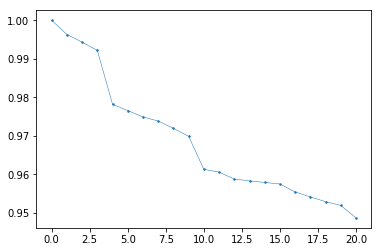

326

In [35]:
get_pose_kp(kp1)